In [318]:
import pandas as pd
import matplotlib.pyplot as plt

In [319]:
invert_indx_df = pd.read_json('./invert_index.json').transpose()
doc_info_df = pd.read_json('./doc_info.json').transpose()

In [320]:
invert_indx_df = invert_indx_df.sort_values(by='DF', ascending=False)
top_word_df = invert_indx_df[:10]
top_word_df = top_word_df.drop(['DocIDs','DocTF'], axis=1)
top_word_df

,DF
اوکیه,38
سینا,31
خوبه,25
عزیزم,23
کار,22
لینوکس,21
بابا,21
فعلا,20
نصب,19
سنندج,18


In [321]:
doc_info_df

,from,time
1,Yasin,07.09.2019 15:34:42
2,سینا,07.09.2019 15:35:13
3,Yasin,07.09.2019 15:35:13
4,سینا,07.09.2019 15:35:30
5,Yasin,07.09.2019 15:35:34
...,...,...
1833,سینا,07.09.2019 15:27:21
1834,سینا,07.09.2019 15:28:50
1835,Yasin,07.09.2019 15:29:02
1836,سینا,07.09.2019 15:30:04


In [322]:
top_word_df.to_latex

<bound method NDFrame.to_latex of         DF
اوکیه   38
سینا    31
خوبه    25
عزیزم   23
کار     22
لینوکس  21
بابا    21
فعلا    20
نصب     19
سنندج   18>

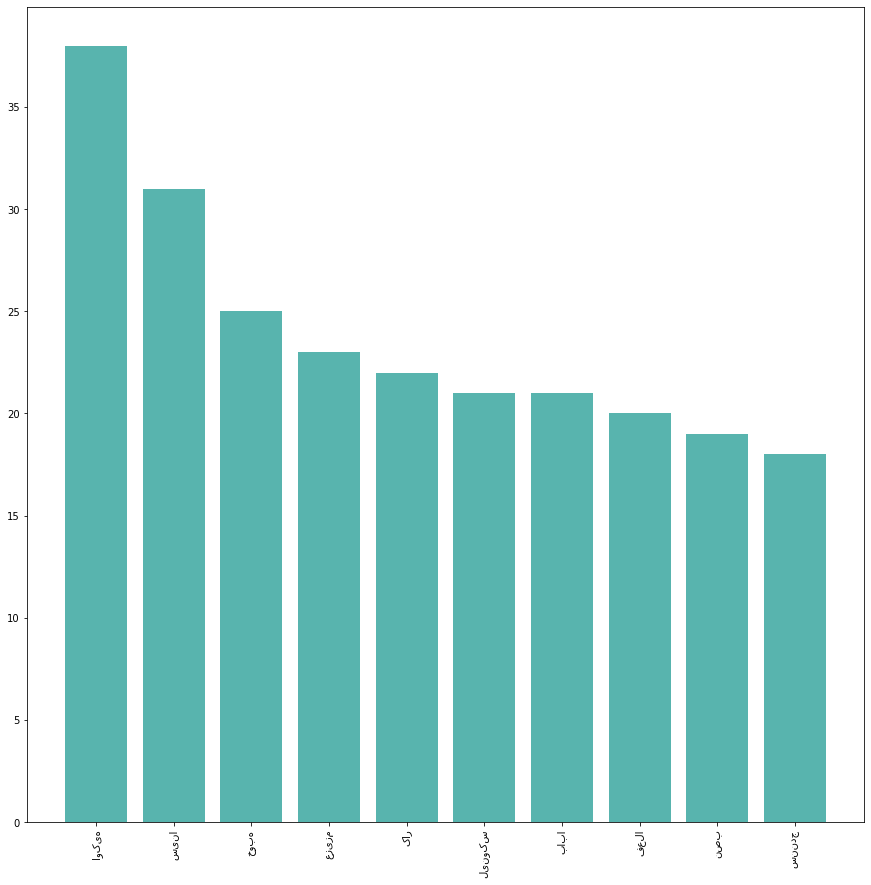

In [355]:
plt.figure(figsize=(15,15))
# plt.subplot(2,2,1)
plt.bar(top_word_df.index , top_word_df.DF, color='#58b4ae')
plt.xticks(rotation='vertical')



plt.show()

In [324]:
persons = doc_info_df['from'].unique()
persons
# person_message_count  = pd.DataFrame(doc_info_df['from'].value_counts())
# person_message_count

array(['Yasin        ', 'سینا        '], dtype=object)

/home/hakim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


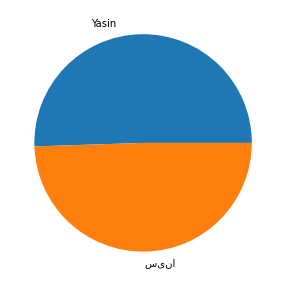

In [367]:
# plt.bar(person_message_count.index, person_message_count['from'], color=['#5fdde5', '#f37121'])
plt.figure(figsize=(5,5))
plt.pie(person_message_count, labels=persons)
plt.show()

In [345]:
import re
# each_persons_doc_time = pd.DataFrame(doc_info_df.loc[doc_info_df['from'] == persons[0]])
# print(each_persons_doc_time)

# date_time = each_persons_doc_time.iloc[1]['time']

day = []
hour = []
for row in range(len(doc_info_df)):
    date_time = doc_info_df.iloc[row]['time']
    date_time_re = re.findall('(\d{2}\.\d{2}\.\d{4})\s(\d{2}):\d{2}:\d{2}', date_time)
    day.append(date_time_re[0][0])
    hour.append(str(date_time_re[0][1]+':00'))

doc_info_df['day'] = day
doc_info_df['hour'] = hour

# doc_info_df['day'].unique()
hour_counts = pd.DataFrame(doc_info_df['hour'].value_counts())
day_counts = pd.DataFrame(doc_info_df['day'].value_counts())
day_counts_top = day_counts[:10]
hour_counts_top = hour_counts.sort_index()
day_counts_top


,day
01.09.2019,226
07.09.2019,214
14.08.2019,146
05.06.2019,106
10.09.2019,81
07.06.2019,78
20.04.2020,67
10.06.2019,58
03.04.2019,56
06.06.2019,52


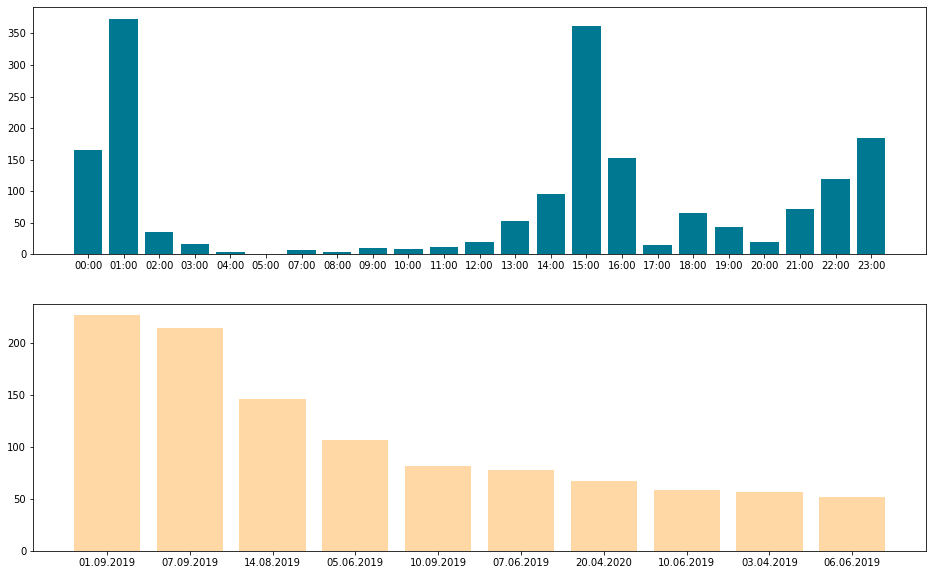

In [375]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.bar(hour_counts_top.index,hour_counts_top.hour, color='#007892')

plt.subplot(2,1,2)
plt.bar(day_counts_top.index, day_counts_top.day, color='#ffd8a6')

plt.show()